In [29]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = load_breast_cancer()
X, y = df['data'], df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=df['feature_names'])
X_test = pd.DataFrame(X_test, columns=df['feature_names'])

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.9824561403508771

In [33]:
permimps = []
n = 5
for column in X_test.columns:
    importance = 0
    for _ in range(n):
        X_permuted = X_test.copy()
        X_permuted[column] = np.random.permutation(X_permuted[column])
        y_pred = model.predict(X_permuted)
        accuracy = accuracy_score(y_test, y_pred)
        #print(column, accuracy)
        importance += (base_accuracy - accuracy)
    importance /= n
    permimps.append(importance)


In [34]:
importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': permimps
}).sort_values('importance', ascending=False)

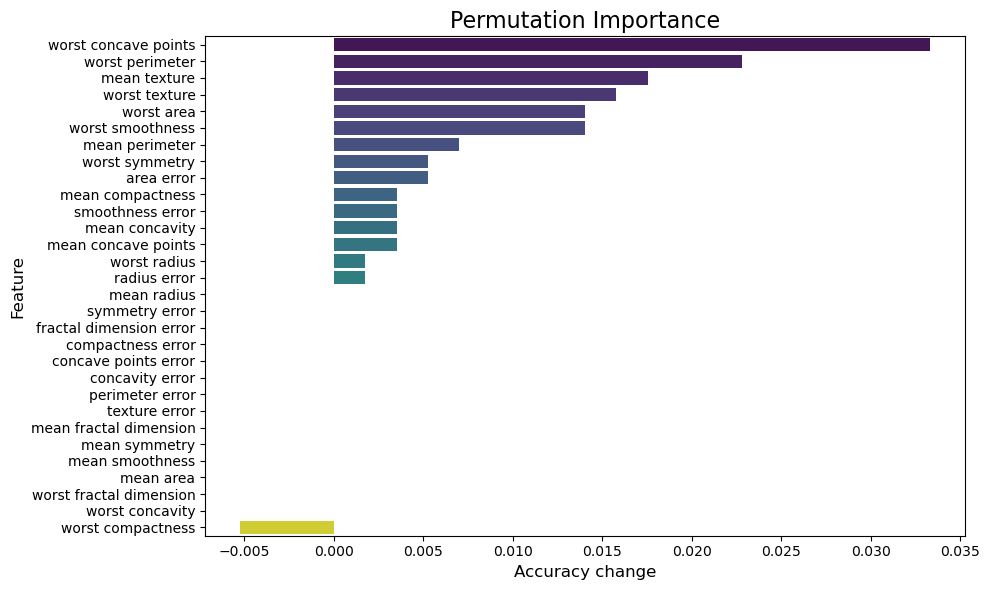

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=importance,
    x="importance",
    y="feature",
    legend=False,
    palette="viridis"
)

plt.title("Permutation Importance", fontsize=16)
plt.xlabel("Accuracy change", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()